# Kompleksisuuden mittaamisesta

Tässä esseessä tutkitaan kahta eri algoritmia, jotka laskee kahden luvun suurimman yhteisen tekijän, ja keskitytään tarkastelemaan lähinnä niiden aikavaativuutta eri tavoilla.

## Algoritmit
Ensimmäinen algoritmi käyttää vain vertailuja ja vähennyslaskuja, jotka voidaan suorittaa $O(max\{n, m\})$ bittioperaatiolla, missä $n$ ja $m$ ovat lukujen binääriesityksien pituudet.

#### Algoritmi 1
Ensimmäisessä algoritmissa vähennellään lukuja toisistaan vuorotellen niin, että luvut pysyvät ei-negatiivisina. Tällä tavoin päästään pienimpään positiiviseen lukuun, joka saadaan alkuperäisten lukujen $a$ ja $b$ lineaarikombinaationa. Tämä luku on lukujen $a$ ja $b$ suurin yhteinen tekijä.

In [13]:
def syt(a, b):
    kierros = 0
    while a > 0 and b > 0:
        if a > b:
            a = a - b
        else:
            b = b - a
        kierros += 1
    return((a, kierros))

Algoritmissa pidetään kirjaa tarvittavien kierrosten määrästä. Jokaisella kierroksella tehdään kolme vertailua ja yksi vähennyslasku, eli yksi kierros on $O(n)$.

Toinen algoritmi on tavallinen Eukleideen algoritmi, jossa käytetään jakojäännöstä, jonka laskeminen onnistuu $O(n^2)$ bittioperaatiolla.

#### Algoritmi 2

In [14]:
def eukl(a, b):
    q = max(a, b)
    r = min(a, b)
    kierros = 0
    while r != 0:
        q, r = r, q % r
        kierros += 1
    return (q, kierros)

Eukleideen algoritmissa tarvitaan kierroksia korkeintaan $O(n)$ kappaletta. Luentomonisteessa huomautetaan, että joissain tapauksissa vähemmällä ei selviä, esimerkiksi peräkkäisten Fibonaccin lukujen sytin laskemisessa.

## Aikavaativuus

Vertaillaan algoritmien vaatimien kierrosten lukumäärää:

In [20]:
def vertailu(a, b):
    print("Algoritmi 1: syöte: a = %d, b = %d" % (a,b))
    print("             syt: %d, kierroksia: %d \n" % (syt(a,b)))

    print("Algoritmi 2: syöte: a = %d, b = %d" % (a,b))
    print("             syt: %d, kierroksia: %d \n \n" % (eukl(a,b)))

In [21]:
a = 233
b = 144
vertailu(a,b)

b = 233
vertailu(a,b)

b = 1
vertailu(a,b)

Algoritmi 1: syöte: a = 233, b = 144
             syt: 1, kierroksia: 12 

Algoritmi 2: syöte: a = 233, b = 144
             syt: 1, kierroksia: 11 
 

Algoritmi 1: syöte: a = 233, b = 233
             syt: 233, kierroksia: 1 

Algoritmi 2: syöte: a = 233, b = 233
             syt: 233, kierroksia: 1 
 

Algoritmi 1: syöte: a = 233, b = 1
             syt: 1, kierroksia: 233 

Algoritmi 2: syöte: a = 233, b = 1
             syt: 1, kierroksia: 1 
 



Peräkkäisten Fibonaccin lukujen sytin laskemisessa algoritmit suoriutuvat suunnilleen yhtä monessa kierroksessa, samoin luvun sytin itsensä kanssa, mutta $syt(a, 1)$ laskemiseen algoritmilla 1 menee $a$ kierrosta, eli $O(2^n)$ laskutoimitusta ja vertailua! Laskutoimitukset ovat tosin erityisen edullisia: ykkösen vähetäminen luvusta onnistuu ajassa $O(1)$, mutta joka silti algoritmi on kelvoton huonoimmassa tapauksessa.

Huomautettakoon, että algoritmi 1 toimii Eukleideen algoritmia paremmin peräkkäisillä Fibonaccin luvuilla, koska kierrokset on aikakompleksisuusmielessä halvempaa kertaluokkaa.

## Visualisointi
Havainnollistetaan vielä molempien algoritmien suorituskykyä eri tapauksissa.

In [16]:
%matplotlib inline

In [32]:
n = 31

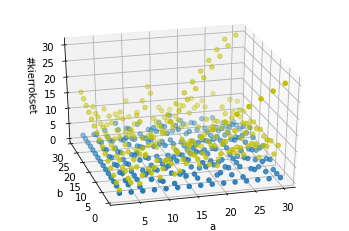

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax2 = fig.add_subplot(111, projection='3d')

x = []
y = []
z1 = []
z2 = []
step = int(n/12)

for a in range(1,n,step):
    for b in range(2,n,step):
        x.append(a)
        y.append(b)
        z1.append(syt(a,b)[1])
        z2.append(eukl(a,b)[1])

ax.scatter(y,x,z1,c='y')
ax.scatter(y,x,z2)
#ax2.scatter(y,x,z2)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('#kierrokset')

ax.view_init(30, -105)
plt.show()

kaksi scatter plottia: ekassa pienet pisteet molempia ja tokassa pelkästään eukl

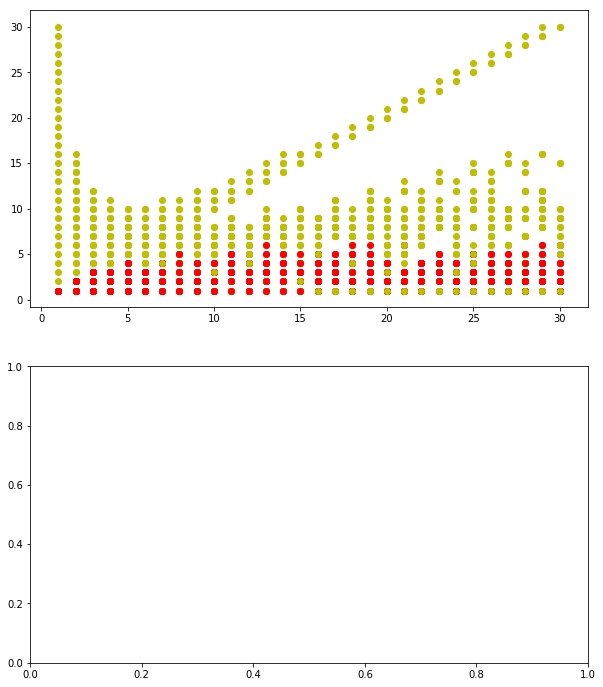

In [53]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

x = list(range(1,n))
y = list(range(1,n))

for a in x:
    z1 = []
    z2 = []
    for b in y:
        z1.append(syt(a,b)[1])
        z2.append(eukl(a,b)[1])
    axs[0].scatter(x,z2, c = 'r')
    axs[0].scatter(x,z1, c = 'y')
    

plt.show()